# Import Libraries

In [14]:
import pandas as pd
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Populate

### PROMPT Candidates 

In [119]:
candidate_count = int(input("Enter candidate count: "))
candidates = list()
for i in range (candidate_count):
    candidates.append(input(f"Enter name of candidate {i+1}: "))

Enter candidate count: 3
Enter name of candidate 1: a
Enter name of candidate 2: b
Enter name of candidate 3: c


### PROMPT Ranks

In [242]:
voters_count = int(input("Enter voters count: "))
ranks = list()
for i in range(voters_count):
    print(f"Vote N{i+1}")
    temp_rank = list()
    for j in range(candidate_count):
        temp_rank.append((input(f"Enter rank for {j+1}: ")))
    ranks.append(temp_rank)
    
pair_count = int(candidate_count*(candidate_count-1)/2)

Enter voters count: 3
Vote N1
Enter rank for 1: a
Enter rank for 2: c
Enter rank for 3: b
Vote N2
Enter rank for 1: a
Enter rank for 2: c
Enter rank for 3: b
Vote N3
Enter rank for 1: b
Enter rank for 2: c
Enter rank for 3: a


In [244]:
ranks

[['a', 'c', 'b'], ['a', 'c', 'b'], ['b', 'c', 'a']]

### Import from file

In [15]:
filename = open('./app/test.txt', 'r')
lines = filename.readlines()

candidates_count = int(lines[0].split()[0])
candidates = lines[1].split()
voters_count = int(lines[2].split()[0])
ranks = list()
for i in range (3, 3 + voters_count):
    ranks.append(lines[i].split())
    
filename.close()

# Functions

### Get data from file

In [17]:
def get_data_from_file():
    filename = open('test.txt', 'r')
    lines = filename.readlines()

    candidates_count = int(lines[0].split()[0])
    candidates = lines[1].split()
    voters_count = int(lines[2].split()[0])
    ranks = list()
    for i in range (3, 3 + voters_count):
        ranks.append(lines[i].split())

    filename.close()

### Add pairs

In [18]:
def add_pairs(ranks):
    pairs = dict()
    for rank in ranks:
        for pair in list(itertools.permutations(rank, 2)):
            if pair not in pairs:
                pairs[pair] = 0
            if rank.index(pair[0]) < rank.index(pair[1]):
                pairs[pair] += 1
    return candidates, pairs

### Record Preferences

In [19]:
def record_prefernces(candidates, pairs):
    preferences = dict()
    for match in list(itertools.combinations(candidates, 2)):
        reverse = tuple(reversed(match))
        if pairs[match] > pairs[reverse]:
            preferences[match] = match[0]
        else:
            preferences[match] = match[1]
    return preferences

### Find Winner

In [20]:
def find_winner(candidates, preferences):
    for candidate in candidates:
        candidate_score = 0
        for preference in preferences:
            if candidate in preference and preferences[preference] == candidate:
                candidate_score += 1
        if candidate_score == len(candidates) - 1:
            return candidate

### Build Graph

In [21]:
def build_graph(preferences):
    graph = set()
    for i in range(len(preferences)):
        node = list(preferences.values())[i]
        if list(preferences.keys())[i][0] != node:
            graph.add(list(preferences.keys())[i][::-1])
        else:
            graph.add(list(preferences.keys())[i])
    
    G = nx.DiGraph()
    G.add_edges_from(list(graph))

    nx.draw(G, with_labels = True)
    plt.show()

# Main

In [22]:
candidates, pairs = add_pairs(ranks)
preferences = record_prefernces(candidates, pairs)
print(find_winner(candidates, preferences))

Alice


In [26]:
candidates

['Alice', 'Charlie', 'Bob']

In [23]:
pairs

{('Alice', 'Charlie'): 5,
 ('Alice', 'Bob'): 5,
 ('Charlie', 'Alice'): 4,
 ('Charlie', 'Bob'): 6,
 ('Bob', 'Alice'): 4,
 ('Bob', 'Charlie'): 3}

In [24]:
preferences

{('Alice', 'Charlie'): 'Alice',
 ('Alice', 'Bob'): 'Alice',
 ('Charlie', 'Bob'): 'Charlie'}

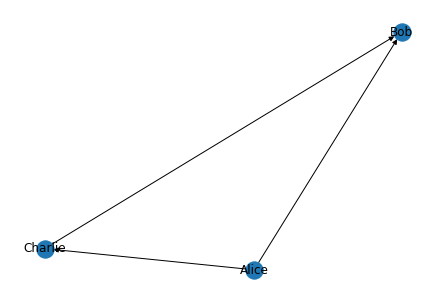

In [25]:
build_graph(preferences)